In [1]:
# Dependences and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from scipy import stats

In [2]:
# Load the CSV file and display sample data
shopping_df = Path("shopping_trends_updated.csv")
shopping_df = pd.read_csv(shopping_df)
shopping_df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
#Add age groups to the DataFrame
shopping_df["Age Groups"] = pd.cut(
    x=shopping_df["Age"],
    bins =[1, 26, 42, 59, np.inf],
    labels=["Gen Z", "Millennials", "Gen X", "Baby Boomer"], 
)

shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gen X
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Gen Z
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Gen X
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Gen Z
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Millennials
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Gen X
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Gen X
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Gen X


In [4]:
# Reorganize the columns within the DataFrame
organized_df = shopping_df[["Customer ID", "Age", "Age Groups", "Gender", 
                            "Item Purchased", "Category", "Purchase Amount (USD)", 
                            "Location", "Size", "Color", "Season", "Review Rating", 
                            "Subscription Status", "Shipping Type", "Discount Applied", 
                            "Promo Code Used", "Previous Purchases", "Payment Method", 
                            "Frequency of Purchases"]]
organized_df.head()

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Calculate the percentage of each group

# Percentage of Millennials
millennials_count = organized_df.loc[organized_df["Age Groups"] == "Millennials"].shape[0]
total_count = len(organized_df["Age Groups"])
millennials_percent = (millennials_count/total_count) * 100

# Percentage of GenZ
GenZ_count = organized_df.loc[organized_df["Age Groups"] == "Gen Z"].shape[0]
total_count = len(organized_df["Age Groups"])
GenZ_percent = (GenZ_count/total_count) * 100

# Percentage of GenX
GenX_count = organized_df.loc[organized_df["Age Groups"] == "Gen X"].shape[0]
total_count = len(organized_df["Age Groups"])
GenX_percent = (GenX_count/total_count) * 100

# Percentage of Baby Boomers
Baby_count = organized_df.loc[organized_df["Age Groups"] == "Baby Boomer"].shape[0]
total_count = len(organized_df["Age Groups"])
Baby_percent = (Baby_count/total_count) * 100

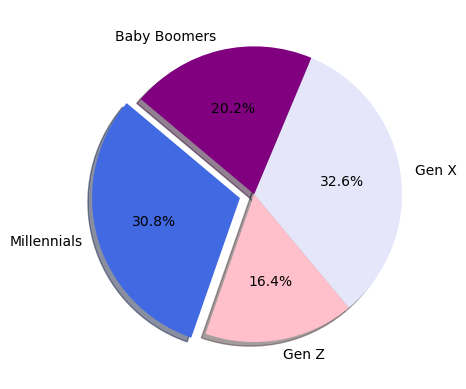

In [6]:
# Establish data for the pie chart
labels = ["Millennials", "Gen Z", "Gen X", "Baby Boomers"]
sizes = [millennials_percent, GenZ_percent, GenX_percent, Baby_percent]
colors = ['royalblue','pink','lavender','purple']
explode = (0.1, 0, 0, 0)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [7]:
# organized_df.to_csv("output_data/shopping_trends.csv", index_label="Customer ID")

In [8]:
gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())
gen_group_count

/var/folders/46/ts8y8d316y90ddxp6yyx4cb80000gn/T/ipykernel_72854/1805281516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gen_group_count = pd.DataFrame(organized_df.groupby("Age Groups")["Customer ID"].count())


,Customer ID
Age Groups,
Gen Z,640
Millennials,1200
Gen X,1272
Baby Boomer,788


In [9]:
organized_df["Age Groups"].value_counts()

Age Groups
Gen X          1272
Millennials    1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

In [10]:
organized_df["Gender"].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [11]:
organized_df.groupby(["Age Groups"])["Gender"].value_counts()

/var/folders/46/ts8y8d316y90ddxp6yyx4cb80000gn/T/ipykernel_72854/1705233892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  organized_df.groupby(["Age Groups"])["Gender"].value_counts()


Age Groups   Gender
Gen Z        Male      442
             Female    198
Millennials  Male      822
             Female    378
Gen X        Male      846
             Female    426
Baby Boomer  Male      542
             Female    246
Name: count, dtype: int64

In [12]:
GenZ_male = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Male")].sample(n=198)
GenZ_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2304,2305,26,Gen Z,Male,Hoodie,Clothing,73,Louisiana,L,Silver,Winter,4.7,No,Free Shipping,No,No,9,Debit Card,Fortnightly
1868,1869,23,Gen Z,Male,Gloves,Accessories,58,Indiana,M,Silver,Spring,4.7,No,Next Day Air,No,No,44,Cash,Fortnightly
2430,2431,20,Gen Z,Male,Jacket,Outerwear,100,North Dakota,XL,White,Summer,4.3,No,Express,No,No,42,Cash,Quarterly
276,277,25,Gen Z,Male,Skirt,Clothing,30,South Dakota,XL,Turquoise,Fall,3.5,Yes,Express,Yes,Yes,11,Bank Transfer,Fortnightly
862,863,19,Gen Z,Male,Coat,Outerwear,84,Arkansas,M,Charcoal,Winter,4.9,Yes,Standard,Yes,Yes,13,PayPal,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,2475,23,Gen Z,Male,T-shirt,Clothing,76,North Carolina,M,Olive,Fall,3.2,No,Store Pickup,No,No,19,Bank Transfer,Quarterly
2327,2328,20,Gen Z,Male,Skirt,Clothing,94,Alabama,M,Red,Winter,4.2,No,2-Day Shipping,No,No,22,Venmo,Bi-Weekly
223,224,20,Gen Z,Male,Pants,Clothing,41,Wyoming,M,Turquoise,Spring,4.8,Yes,Free Shipping,Yes,Yes,34,PayPal,Annually
2592,2593,23,Gen Z,Male,Shorts,Clothing,23,Iowa,XL,Peach,Summer,4.4,No,Store Pickup,No,No,13,Venmo,Quarterly


In [13]:
Mill_male = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Male")].sample(n=198)
Mill_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1151,1152,41,Millennials,Male,Blouse,Clothing,86,Ohio,M,Gray,Spring,4.2,No,Express,Yes,Yes,24,Credit Card,Weekly
2152,2153,38,Millennials,Male,Shorts,Clothing,48,New Jersey,L,Magenta,Summer,4.5,No,Next Day Air,No,No,43,Bank Transfer,Bi-Weekly
1324,1325,39,Millennials,Male,Jewelry,Accessories,77,Indiana,S,Orange,Summer,3.8,No,Free Shipping,Yes,Yes,11,Credit Card,Fortnightly
2270,2271,27,Millennials,Male,Blouse,Clothing,72,Georgia,L,Purple,Spring,3.5,No,Express,No,No,7,Venmo,Weekly
1305,1306,31,Millennials,Male,Pants,Clothing,56,Mississippi,XL,Peach,Spring,4.5,No,Express,Yes,Yes,2,PayPal,Every 3 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,36,Millennials,Male,Belt,Accessories,100,North Dakota,S,Silver,Fall,3.0,Yes,Standard,Yes,Yes,29,Venmo,Annually
1209,1210,41,Millennials,Male,Pants,Clothing,62,Pennsylvania,M,Blue,Winter,3.8,No,Next Day Air,Yes,Yes,16,Bank Transfer,Monthly
1370,1371,27,Millennials,Male,Scarf,Accessories,67,Montana,L,Peach,Summer,2.9,No,2-Day Shipping,Yes,Yes,41,Bank Transfer,Every 3 Months
2440,2441,31,Millennials,Male,Socks,Clothing,90,Indiana,M,Red,Spring,4.7,No,Standard,No,No,47,Bank Transfer,Annually


In [14]:
GenX_male = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Male")].sample(n=198)
GenX_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1725,1726,45,Gen X,Male,Sunglasses,Accessories,33,Massachusetts,M,Indigo,Spring,3.0,No,Next Day Air,No,No,32,Venmo,Quarterly
916,917,49,Gen X,Male,Jeans,Clothing,34,Illinois,S,Blue,Spring,2.7,Yes,Standard,Yes,Yes,16,Venmo,Monthly
934,935,45,Gen X,Male,Jeans,Clothing,47,Oregon,S,Yellow,Spring,3.7,Yes,Express,Yes,Yes,21,Bank Transfer,Monthly
2001,2002,51,Gen X,Male,Sunglasses,Accessories,90,Wyoming,S,Purple,Winter,2.6,No,Free Shipping,No,No,2,Debit Card,Fortnightly
2213,2214,54,Gen X,Male,Hat,Accessories,94,Hawaii,M,Maroon,Fall,2.9,No,Express,No,No,18,Debit Card,Quarterly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,346,48,Gen X,Male,Shoes,Footwear,59,Wyoming,S,Olive,Winter,4.4,Yes,Next Day Air,Yes,Yes,27,Bank Transfer,Annually
1931,1932,54,Gen X,Male,Jewelry,Accessories,42,Illinois,S,Olive,Spring,2.7,No,Store Pickup,No,No,6,Debit Card,Every 3 Months
834,835,52,Gen X,Male,Backpack,Accessories,89,Nevada,M,Indigo,Summer,3.1,Yes,Free Shipping,Yes,Yes,18,Credit Card,Weekly
2490,2491,52,Gen X,Male,Blouse,Clothing,78,Montana,M,Gray,Spring,4.0,No,Free Shipping,No,No,5,Cash,Every 3 Months


In [15]:
Baby_male = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Male")].sample(n=198)
Baby_male

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
108,109,70,Baby Boomer,Male,Socks,Clothing,79,Montana,L,Purple,Spring,3.4,Yes,Next Day Air,Yes,Yes,32,Bank Transfer,Bi-Weekly
179,180,64,Baby Boomer,Male,Boots,Footwear,31,Illinois,M,Violet,Fall,4.9,Yes,Store Pickup,Yes,Yes,9,Bank Transfer,Fortnightly
1528,1529,69,Baby Boomer,Male,T-shirt,Clothing,75,Oregon,S,Red,Spring,4.0,No,Store Pickup,Yes,Yes,47,Venmo,Bi-Weekly
1239,1240,62,Baby Boomer,Male,Coat,Outerwear,37,New Jersey,XL,Magenta,Spring,4.8,No,Standard,Yes,Yes,32,Debit Card,Every 3 Months
2458,2459,66,Baby Boomer,Male,T-shirt,Clothing,85,Texas,L,Turquoise,Fall,4.6,No,Free Shipping,No,No,17,Bank Transfer,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,2554,69,Baby Boomer,Male,Jewelry,Accessories,25,Vermont,M,Maroon,Summer,4.5,No,Store Pickup,No,No,28,Venmo,Every 3 Months
1987,1988,69,Baby Boomer,Male,Belt,Accessories,23,Vermont,XL,White,Summer,3.4,No,Express,No,No,4,Cash,Quarterly
1723,1724,70,Baby Boomer,Male,Scarf,Accessories,20,New York,XL,Gold,Spring,3.3,No,Standard,No,No,39,PayPal,Annually
1259,1260,68,Baby Boomer,Male,Skirt,Clothing,64,Minnesota,M,Turquoise,Fall,3.9,No,Standard,Yes,Yes,45,Credit Card,Monthly


In [16]:
GenZ_female = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Female")].sample(n=198)
GenZ_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3144,3145,23,Gen Z,Female,Boots,Footwear,70,Maine,L,Beige,Spring,2.6,No,Free Shipping,No,No,12,Debit Card,Quarterly
3765,3766,22,Gen Z,Female,Jewelry,Accessories,52,Missouri,M,Green,Summer,4.3,No,Standard,No,No,14,Bank Transfer,Bi-Weekly
3019,3020,19,Gen Z,Female,Jacket,Outerwear,44,Utah,M,Yellow,Winter,3.9,No,2-Day Shipping,No,No,15,PayPal,Annually
3115,3116,26,Gen Z,Female,Scarf,Accessories,53,South Dakota,M,Charcoal,Fall,4.1,No,Free Shipping,No,No,9,Bank Transfer,Bi-Weekly
3347,3348,22,Gen Z,Female,Shoes,Footwear,70,Iowa,XL,Cyan,Summer,4.4,No,Standard,No,No,28,PayPal,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,3157,18,Gen Z,Female,Shirt,Clothing,50,Montana,M,Black,Winter,3.1,No,2-Day Shipping,No,No,18,Cash,Monthly
2799,2800,23,Gen Z,Female,T-shirt,Clothing,89,Maine,L,Pink,Spring,3.9,No,Free Shipping,No,No,9,Bank Transfer,Every 3 Months
3251,3252,25,Gen Z,Female,Coat,Outerwear,20,Nevada,M,Gold,Winter,3.7,No,Standard,No,No,39,Venmo,Quarterly
3044,3045,21,Gen Z,Female,Boots,Footwear,67,North Carolina,M,Magenta,Winter,2.7,No,Free Shipping,No,No,10,Bank Transfer,Quarterly


In [17]:
Mill_female = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Female")].sample(n=198)
Mill_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3574,3575,29,Millennials,Female,Socks,Clothing,70,New York,M,Cyan,Fall,4.9,No,Express,No,No,39,Bank Transfer,Quarterly
3882,3883,35,Millennials,Female,Pants,Clothing,95,North Dakota,L,Blue,Fall,2.6,No,Free Shipping,No,No,24,Cash,Fortnightly
3589,3590,31,Millennials,Female,Belt,Accessories,73,New Hampshire,M,Blue,Spring,4.8,No,Next Day Air,No,No,38,Cash,Every 3 Months
2769,2770,32,Millennials,Female,Shirt,Clothing,89,Oklahoma,L,Lavender,Fall,3.0,No,Standard,No,No,13,Cash,Weekly
3265,3266,40,Millennials,Female,Sunglasses,Accessories,100,Alabama,M,White,Winter,3.2,No,Express,No,No,28,Credit Card,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,2903,27,Millennials,Female,Boots,Footwear,32,North Carolina,S,Orange,Spring,4.6,No,Standard,No,No,19,PayPal,Bi-Weekly
2853,2854,37,Millennials,Female,Hat,Accessories,48,Pennsylvania,M,Magenta,Winter,3.2,No,Next Day Air,No,No,9,PayPal,Weekly
2697,2698,42,Millennials,Female,Jacket,Outerwear,52,Delaware,L,Red,Winter,3.2,No,Standard,No,No,36,Bank Transfer,Quarterly
2877,2878,32,Millennials,Female,Socks,Clothing,46,New Jersey,M,Silver,Summer,3.6,No,Standard,No,No,34,Venmo,Monthly


In [18]:
GenX_female = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Female")].sample(n=198)
GenX_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3810,3811,46,Gen X,Female,Skirt,Clothing,79,Wisconsin,L,Peach,Fall,3.9,No,Free Shipping,No,No,29,Venmo,Monthly
3401,3402,44,Gen X,Female,Backpack,Accessories,71,Nevada,L,Peach,Winter,3.4,No,Standard,No,No,39,Credit Card,Weekly
3426,3427,47,Gen X,Female,Socks,Clothing,35,Oregon,XL,Magenta,Fall,4.8,No,2-Day Shipping,No,No,31,Credit Card,Annually
3697,3698,55,Gen X,Female,Hoodie,Clothing,66,Pennsylvania,L,Pink,Winter,3.0,No,Standard,No,No,39,Cash,Weekly
2656,2657,52,Gen X,Female,Shorts,Clothing,76,Indiana,L,Yellow,Winter,3.6,No,Express,No,No,29,Bank Transfer,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850,2851,57,Gen X,Female,Sweater,Clothing,79,Nebraska,M,Silver,Spring,3.0,No,Store Pickup,No,No,36,Debit Card,Annually
2738,2739,50,Gen X,Female,Sneakers,Footwear,81,Ohio,M,Charcoal,Summer,4.3,No,2-Day Shipping,No,No,39,Venmo,Every 3 Months
3625,3626,44,Gen X,Female,Scarf,Accessories,99,Illinois,L,Green,Winter,4.4,No,Express,No,No,32,PayPal,Weekly
3809,3810,57,Gen X,Female,Shoes,Footwear,33,New York,S,Maroon,Winter,3.7,No,Standard,No,No,28,Credit Card,Annually


In [19]:
Baby_female = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Female")].sample(n=198)
Baby_female

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3010,3011,70,Baby Boomer,Female,Belt,Accessories,45,Ohio,M,Violet,Winter,3.3,No,Free Shipping,No,No,15,Credit Card,Annually
3611,3612,63,Baby Boomer,Female,T-shirt,Clothing,82,Washington,M,Silver,Spring,2.9,No,Standard,No,No,30,Credit Card,Annually
3605,3606,68,Baby Boomer,Female,Jeans,Clothing,41,Alabama,M,Gold,Fall,4.3,No,Store Pickup,No,No,36,Bank Transfer,Every 3 Months
3779,3780,60,Baby Boomer,Female,Jeans,Clothing,75,California,XL,Lavender,Spring,4.0,No,Express,No,No,45,PayPal,Annually
3128,3129,65,Baby Boomer,Female,Jacket,Outerwear,32,Arkansas,S,Indigo,Fall,4.4,No,Standard,No,No,20,Cash,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,3875,70,Baby Boomer,Female,Sweater,Clothing,54,Nevada,XL,Beige,Summer,3.9,No,2-Day Shipping,No,No,33,Credit Card,Bi-Weekly
3298,3299,65,Baby Boomer,Female,Jacket,Outerwear,73,New Mexico,M,Brown,Fall,3.5,No,Express,No,No,6,Bank Transfer,Every 3 Months
2719,2720,69,Baby Boomer,Female,Hoodie,Clothing,82,Louisiana,S,Peach,Fall,4.2,No,Free Shipping,No,No,4,Bank Transfer,Monthly
3048,3049,69,Baby Boomer,Female,Jewelry,Accessories,93,Colorado,M,Olive,Summer,3.9,No,Standard,No,No,47,Venmo,Fortnightly


In [20]:
GenZ_male["Review Rating"]

2304    4.7
1868    4.7
2430    4.3
276     3.5
862     4.9
       ... 
2474    3.2
2327    4.2
223     4.8
2592    4.4
772     3.6
Name: Review Rating, Length: 198, dtype: float64

In [21]:
Mill_male["Review Rating"]

1151    4.2
2152    4.5
1324    3.8
2270    3.5
1305    4.5
       ... 
193     3.0
1209    3.8
1370    2.9
2440    4.7
96      3.6
Name: Review Rating, Length: 198, dtype: float64

In [22]:
GenX_male["Review Rating"]

1725    3.0
916     2.7
934     3.7
2001    2.6
2213    2.9
       ... 
345     4.4
1931    2.7
834     3.1
2490    4.0
2350    4.2
Name: Review Rating, Length: 198, dtype: float64

In [23]:
Baby_male["Review Rating"]

108     3.4
179     4.9
1528    4.0
1239    4.8
2458    4.6
       ... 
2553    4.5
1987    3.4
1723    3.3
1259    3.9
691     2.9
Name: Review Rating, Length: 198, dtype: float64

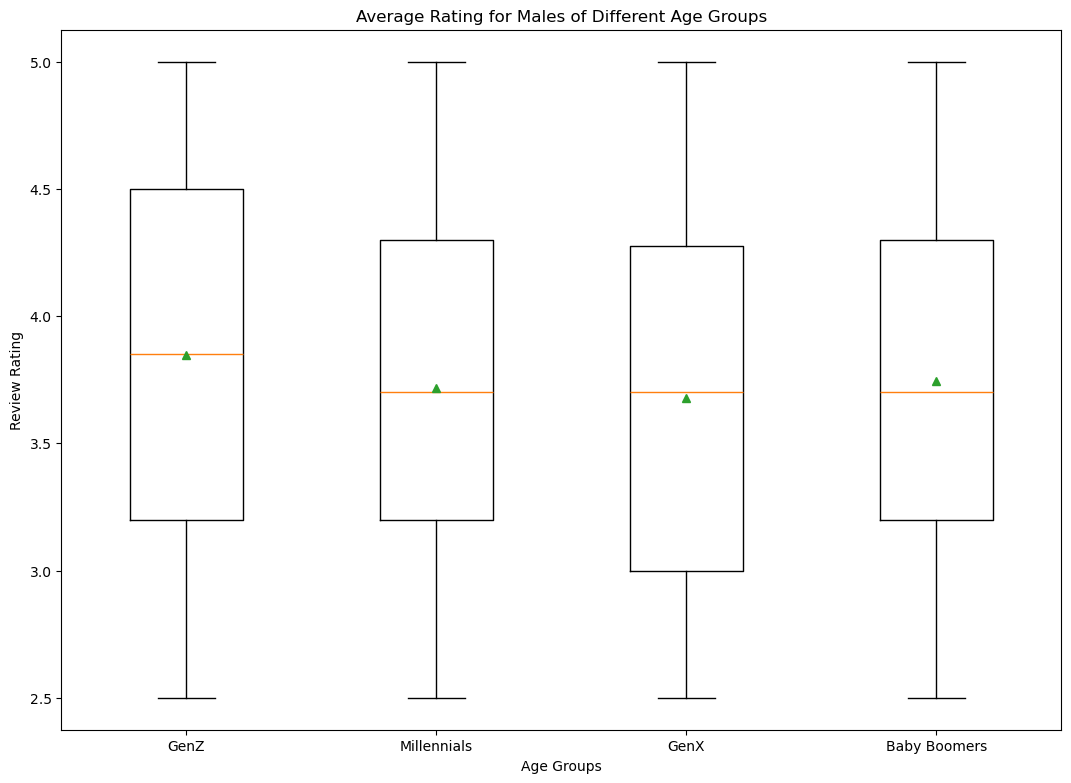

In [24]:
# Box and Whisker plot for Males of different Age Group and Review Rating
# Answers question 1: Is there a relationship between product rating and 
# demographic factors (age group and sex (male/female)?

# Establishing data to be plotted
data_1 = GenZ_male["Review Rating"]
data_2 = Mill_male["Review Rating"]
data_3 = GenX_male["Review Rating"]
data_4 = Baby_male["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Males of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data, showmeans=True)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millennials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

Analysis: Males within the Baby Boomers Age Group gave a the lowest median Review Rating, while males within the Millennials Age Group gave the lowest median Review Rating. The median Review Ratings for Males within GenX and GenZ are roughly the same. GenZ, Millennials, and GenX have roughly the same average review rating, while Baby Boomers has the lowest average review rating.

In [25]:
# Extract individual groups
GenZ_male = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Male"),"Review Rating"]
Mill_male = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Male"),"Review Rating"]
GenX_male = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Male"),"Review Rating"]
Baby_male = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Male"),"Review Rating"]

#Performn the ANOVA
stats.f_oneway(GenZ_male, Mill_male, GenX_male, Baby_male)

F_onewayResult(statistic=2.273643196968091, pvalue=0.07808768548651818)

Analysis: Since the p-value is greater than the alpha-value of 0.05, we can accept the null hypothesis. Therefore, the average review rating for males of different age groups sampled is the same as the average review rating for the population of males of different age groups. 

In [26]:
GenZ_female["Review Rating"]

3144    2.6
3765    4.3
3019    3.9
3115    4.1
3347    4.4
       ... 
3156    3.1
2799    3.9
3251    3.7
3044    2.7
2662    2.8
Name: Review Rating, Length: 198, dtype: float64

In [27]:
Mill_female["Review Rating"]

3574    4.9
3882    2.6
3589    4.8
2769    3.0
3265    3.2
       ... 
2902    4.6
2853    3.2
2697    3.2
2877    3.6
2815    3.9
Name: Review Rating, Length: 198, dtype: float64

In [28]:
GenX_female["Review Rating"]

3810    3.9
3401    3.4
3426    4.8
3697    3.0
2656    3.6
       ... 
2850    3.0
2738    4.3
3625    4.4
3809    3.7
2927    2.7
Name: Review Rating, Length: 198, dtype: float64

In [29]:
Baby_female["Review Rating"]

3010    3.3
3611    2.9
3605    4.3
3779    4.0
3128    4.4
       ... 
3874    3.9
3298    3.5
2719    4.2
3048    3.9
3797    2.5
Name: Review Rating, Length: 198, dtype: float64

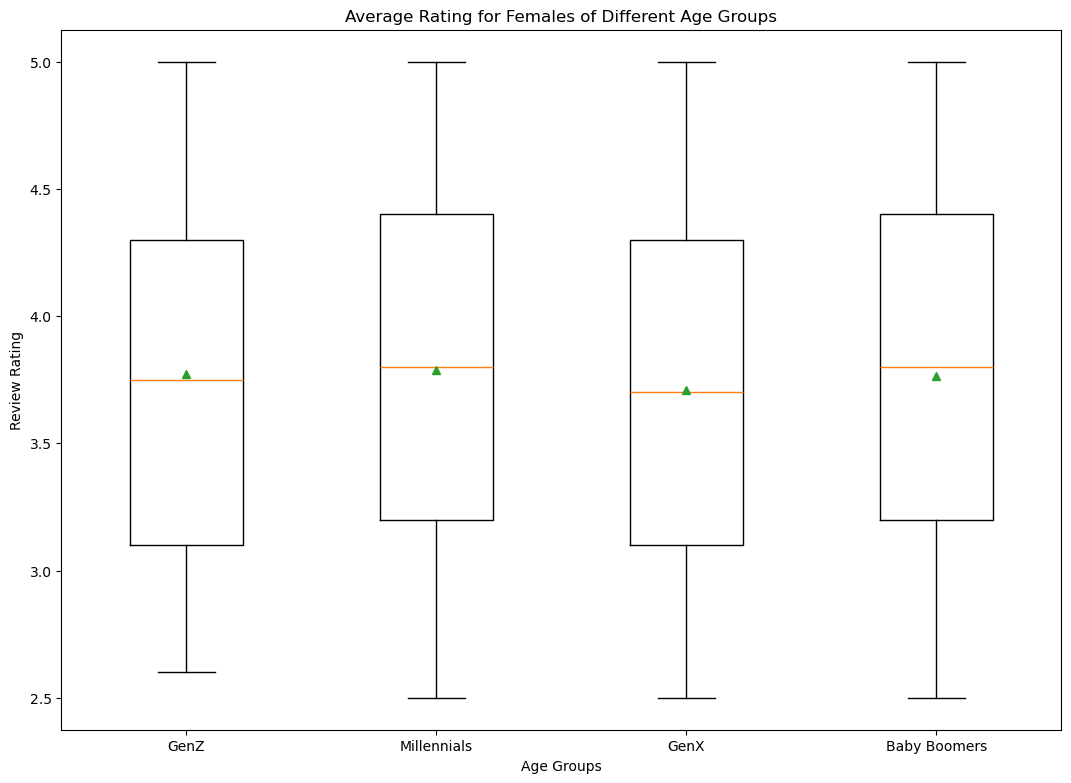

In [30]:
# Box and Whisker plot for Females of different Age Group and Review Rating
# Answers question 1: Is there a relationship between product rating and 
# demographic factors (age group and sex (male/female)?

# Establishing data to be plotted
data_1 = GenZ_female["Review Rating"]
data_2 = Mill_female["Review Rating"]
data_3 = GenX_female["Review Rating"]
data_4 = Baby_female["Review Rating"]
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10,7))

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Average Rating for Females of Different Age Groups')
ax.set_ylabel('Review Rating')
ax.set_xlabel('Age Groups')

# Creating the plot
bp = ax.boxplot(data, showmeans=True)
plt.xticks([1, 2, 3, 4], ['GenZ', 'Millennials', 'GenX', 'Baby Boomers'])

# Show plot
plt.show()

Analysis: Females within the Baby Boomers Age Group gave a higher Review Rating on average, while females within the Millennials Age Group gave the lowest Review Rating on average. Females within GenX Age Group gave an average Review Rating slightly higher than that of GenZ. 

In [31]:
# Extract individual groups
GenZ_female = organized_df.loc[(organized_df["Age Groups"]=="Gen Z")&(organized_df["Gender"]=="Female"),"Review Rating"]
Mill_female = organized_df.loc[(organized_df["Age Groups"]=="Millennials")&(organized_df["Gender"]=="Female"),"Review Rating"]
GenX_female = organized_df.loc[(organized_df["Age Groups"]=="Gen X")&(organized_df["Gender"]=="Female"),"Review Rating"]
Baby_female = organized_df.loc[(organized_df["Age Groups"]=="Baby Boomer")&(organized_df["Gender"]=="Female"),"Review Rating"]

#Performn the ANOVA
stats.f_oneway(GenZ_female, Mill_female, GenX_female, Baby_female)

F_onewayResult(statistic=1.0678780644328576, pvalue=0.3616895713139034)

Analysis: Since the p-value is greater than the alpha-value of 0.05, we can accept the null hypothesis. Therefore, the average review rating for females of different age groups sampled is the same as the average review rating for the population of females of different age groups. 

In [30]:
## What type of clothing is purchased for each season work below this line ##

In [31]:
organized_df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [32]:
organized_df.groupby(["Category"])["Season"].value_counts()

Category     Season
Accessories  Fall      324
             Summer    312
             Winter    303
             Spring    301
Clothing     Spring    454
             Winter    448
             Fall      427
             Summer    408
Footwear     Spring    163
             Summer    160
             Winter    140
             Fall      136
Outerwear    Fall       88
             Spring     81
             Winter     80
             Summer     75
Name: count, dtype: int64

In [33]:
#Locate categories of attire purchased solely during the "Fall" Season
fall_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Fall")])
                              
fall_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
6,7,63,Baby Boomer,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
10,11,53,Gen X,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,Yes,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly
24,25,18,Gen Z,Male,Jacket,Outerwear,22,Florida,M,Green,Fall,2.9,Yes,Store Pickup,Yes,Yes,16,Debit Card,Weekly
28,29,54,Gen X,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Free Shipping,Yes,Yes,41,PayPal,Every 3 Months
29,30,31,Millennials,Male,Dress,Clothing,48,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,14,Credit Card,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3876,3877,60,Baby Boomer,Female,Shoes,Footwear,85,Wisconsin,S,Cyan,Fall,2.6,No,2-Day Shipping,No,No,7,Cash,Annually
3882,3883,35,Millennials,Female,Pants,Clothing,95,North Dakota,L,Blue,Fall,2.6,No,Free Shipping,No,No,24,Cash,Fortnightly
3883,3884,34,Millennials,Female,Hat,Accessories,38,North Dakota,XL,Purple,Fall,4.0,No,Next Day Air,No,No,22,Cash,Fortnightly
3884,3885,47,Gen X,Female,Sandals,Footwear,29,Maryland,M,Brown,Fall,4.9,No,Express,No,No,3,PayPal,Weekly


In [34]:
# Filter the DataFrame down only to those columns to chart
fall_category = fall_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
fall_category_counts = fall_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
fall_category_counts = fall_category_counts.unstack()

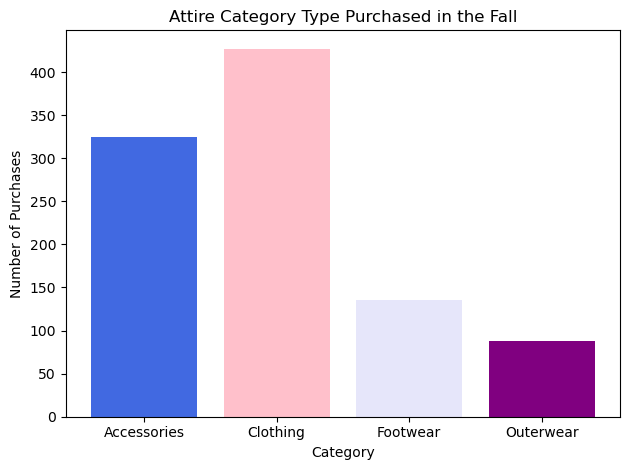

In [35]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(fall_category_counts.T.index, fall_category_counts.T["Fall"], color = color)
plt.title("Attire Category Type Purchased in the Fall")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: During the Fall, Clothing is purchased the most with over 400 purchases, and outerwear is
purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear had roughly fifty more purchases than Outwear.

In [36]:
#Locate categories of attire purchased solely during the "Winter" Season
winter_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Winter")])
                              
winter_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
7,8,27,Millennials,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
11,12,30,Millennials,Male,Shorts,Clothing,68,Hawaii,S,Olive,Winter,4.9,Yes,Store Pickup,Yes,Yes,10,Bank Transfer,Fortnightly
12,13,61,Baby Boomer,Male,Coat,Outerwear,72,Delaware,M,Gold,Winter,4.5,Yes,Express,Yes,Yes,37,Venmo,Fortnightly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,3880,26,Gen Z,Female,Skirt,Clothing,63,Florida,L,Maroon,Winter,4.1,No,Free Shipping,No,No,6,Debit Card,Quarterly
3880,3881,42,Millennials,Female,Shirt,Clothing,20,Massachusetts,M,Red,Winter,3.9,No,Free Shipping,No,No,40,PayPal,Monthly
3885,3886,49,Gen X,Female,Socks,Clothing,64,New Mexico,L,Purple,Winter,3.2,No,Free Shipping,No,No,39,Cash,Quarterly
3890,3891,35,Millennials,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually


In [37]:
# Filter the DataFrame down only to those columns to chart
winter_category = winter_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
winter_category_counts = winter_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
winter_category_counts = winter_category_counts.unstack()

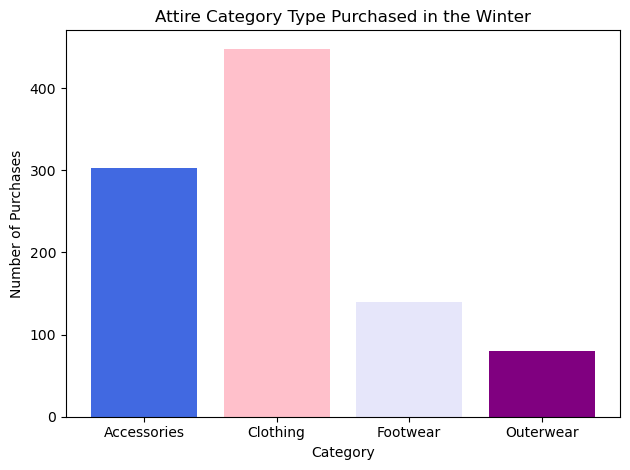

In [38]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(winter_category_counts.T.index, winter_category_counts.T["Winter"], color = color)
plt.title("Attire Category Type Purchased in the Winter")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: Similar to the Fall, during the Winter, Clothing is purchased the most with over 400 purchases, and outerwear is purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear had roughly fifty more purchases than Outwear.

In [39]:
#Locate categories of attire purchased solely during the "Spring" Season
spring_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Spring")])
                              
spring_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
9,10,57,Gen X,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly
13,14,65,Baby Boomer,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,4.7,Yes,Express,Yes,Yes,31,PayPal,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,3890,57,Gen X,Female,Dress,Clothing,65,Alaska,S,Yellow,Spring,3.5,No,Express,No,No,49,Bank Transfer,Annually
3894,3895,66,Baby Boomer,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3896,3897,52,Gen X,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Gen X,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly


In [40]:
# Filter the DataFrame down only to those columns to chart
spring_category = spring_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
spring_category_counts = spring_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
spring_category_counts = spring_category_counts.unstack()

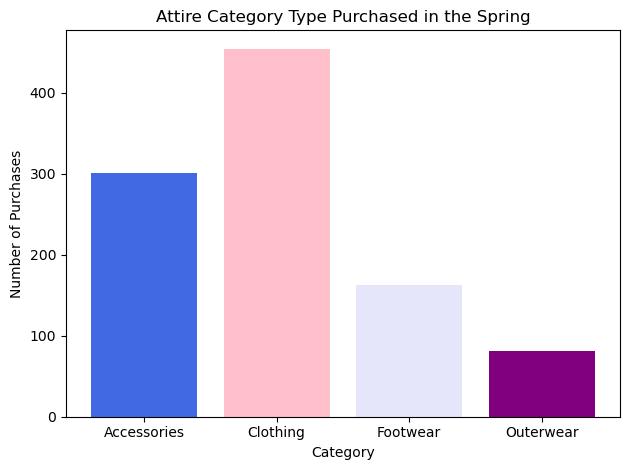

In [41]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(spring_category_counts.T.index, spring_category_counts.T["Spring"], color = color)
plt.title("Attire Category Type Purchased in the Spring")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: The Spring's Categories were roughly the same as Fall and Winter, whereby Clothing is purchased the most with over 400 purchases, and outerwear is purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear came in third with  over 1.5 times the number of purchases of Outwear.

In [42]:
#Locate categories of attire purchased solely during the "Summer" Season
summer_df = pd.DataFrame(organized_df.loc[(organized_df["Season"] == "Summer")])
                              
summer_df

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
5,6,46,Gen X,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
8,9,26,Gen Z,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
18,19,52,Gen X,Male,Sweater,Clothing,48,Montana,S,Black,Summer,4.6,Yes,Free Shipping,Yes,Yes,17,Cash,Weekly
19,20,66,Baby Boomer,Male,Pants,Clothing,90,Rhode Island,M,Green,Summer,3.3,Yes,Standard,Yes,Yes,46,Debit Card,Bi-Weekly
22,23,56,Gen X,Male,Pants,Clothing,37,California,M,Peach,Summer,3.2,Yes,Store Pickup,Yes,Yes,32,Debit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3879,60,Baby Boomer,Female,Hat,Accessories,42,South Carolina,M,Pink,Summer,3.4,No,2-Day Shipping,No,No,24,Credit Card,Annually
3886,3887,37,Millennials,Female,Jewelry,Accessories,92,Iowa,S,Brown,Summer,3.9,No,Express,No,No,40,Debit Card,Quarterly
3892,3893,35,Millennials,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3895,3896,40,Millennials,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly


In [43]:
# Filter the DataFrame down only to those columns to chart
summer_category = summer_df[["Season", "Category"]]

# Group by "Season" and "Category" and count the occurrences
summer_category_counts = summer_category.groupby(["Season", "Category"]).size()

# Reshape the data to have "Season" as rows and "Category" as columns
summer_category_counts = summer_category_counts.unstack()

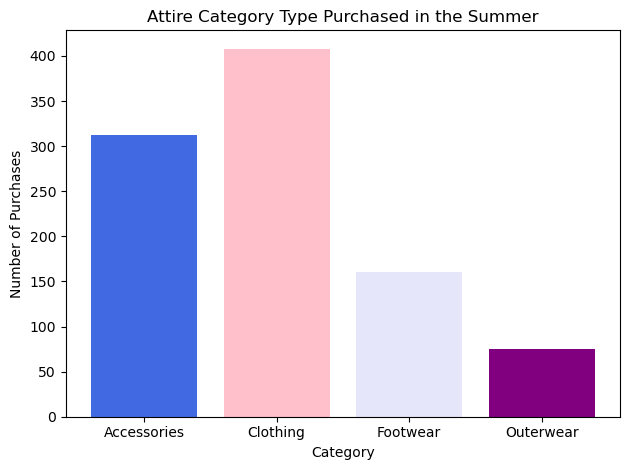

In [44]:
# Plot the data
color = ['royalblue','pink','lavender','purple']
fig, ax = plt.subplots()
ax.bar(summer_category_counts.T.index, summer_category_counts.T["Summer"], color = color)
plt.title("Attire Category Type Purchased in the Summer")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

Analysis: The Summer's Categories were roughly the same as the other three seasons, whereby Clothing is purchased the most with over 400 purchases, and outerwear is purchased the least with just under 100 purchases. Accessories had the second highest number of purchases, while Footwear came in third with  over two times the number of purchases of Outwear.

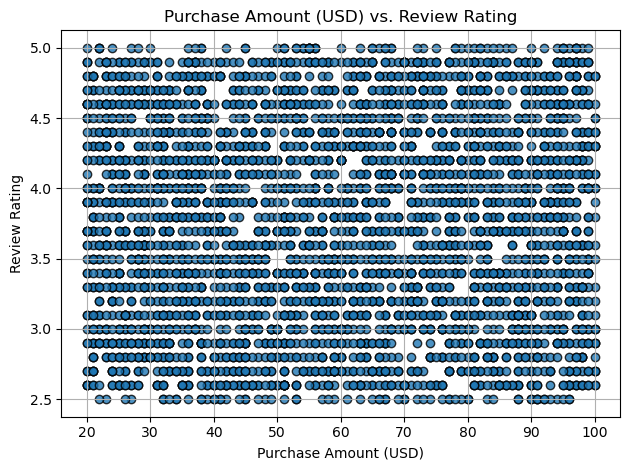

In [45]:
## Is there a relationship between review rating and purchase amount? ##

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Purchase Amount (USD)"], organized_df["Review Rating"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Review Rating")
plt.title("Purchase Amount (USD) vs. Review Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between Purchase Amount (USD) and Review Rating.

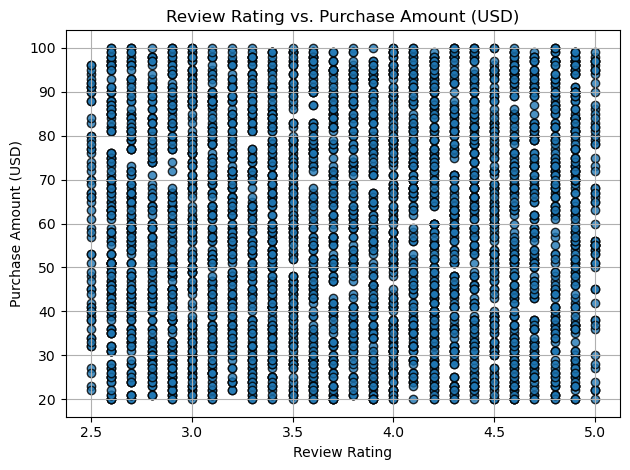

In [46]:
## Is there a relationship between purchase amount and review rating? ##

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Review Rating"], organized_df["Purchase Amount (USD)"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Review Rating")
plt.ylabel("Purchase Amount (USD)")
plt.title("Review Rating vs. Purchase Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between review rating and purchase amount (USD). 

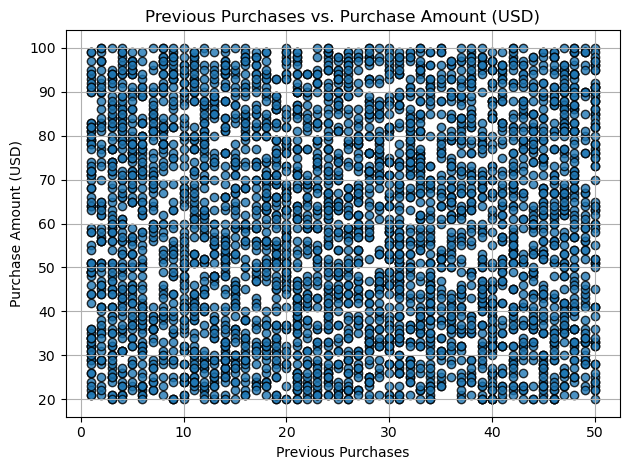

In [47]:
## Is there a relationship between Previous Purchases and number of Purchase Amount (USD)?

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Previous Purchases"], organized_df["Purchase Amount (USD)"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.title("Previous Purchases vs. Purchase Amount (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between Previous Purchases and Purchase Amount (USD).

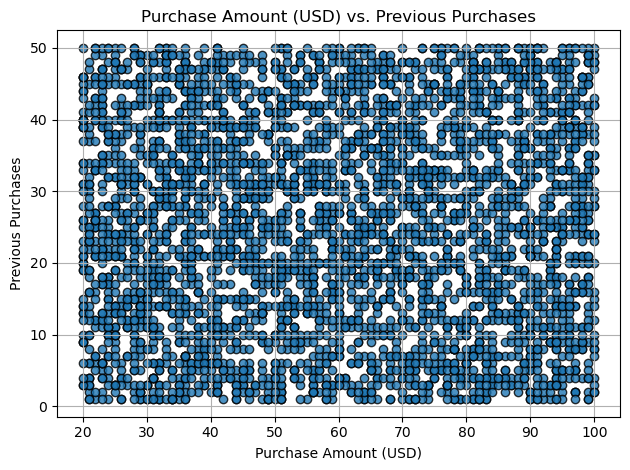

In [48]:
## Is there a relationship between Purchase Amount (USD) and number of Previous Purchases?

# Build the scatterplot for product rating and purchase amount
plt.scatter(organized_df["Purchase Amount (USD)"], organized_df["Previous Purchases"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Previous Purchases")
plt.title("Purchase Amount (USD) vs. Previous Purchases")
plt.grid(True)
plt.tight_layout()
plt.show()

There is no relationship (no correlation) between Purchase Amount (USD) and Previous Purchases.